# 第一題 myknn_regressor

## Q1. 1 Create your myknn_regressor.

說明：我在myknn_regressor中設定兩個augments分別為K值以及prediction的計算方式（我預設為使用equal_weight），fit function用來寫入Training set，而predict function用來預測結果。 \

在predict function裡，我先做Euclidean Distance的計算，再使用numpy.argsort做距離的排序，最後使用距離的排序把Y_train叫出來並作均值計算成為最後的預測結果Y_Pred

In [86]:
# Main Frame
class myknn_regressor:
    def __init__(self, k_neighbors, f):
        self.k_neighbors = k_neighbors
        
        if self.k_neighbors < 10:
            self.f = "equal_weight"      
        else:
            self.f = f
        
    def fit(self, X_Train, Y_Train):   
        self.X_Train = X_Train
        self.Y_Train = Y_Train
    
    def predict(self, X_Test):
        import numpy as np
        self.X_Test = X_Test
        Year_Pred = []
        
        for i in self.X_Test:  
            Rank = np.argsort(np.sqrt(((i - self.X_Train) ** 2).sum(axis = 1)))   # 單一測試點對所有訓練點的距離的排序
            Year_Pred.append(y_train[Rank][ : self.k_neighbors]) #使用Rank作為呼叫Y的位置，把Y呼叫出來並只取前K筆
            
        Y_Pred = []
        
        if self.f == "equal_weight":
            for i in Year_Pred:
                Y_Pred.append(np.mean(i))
                # Y_Pred.append(round(np.mean(i)))
            return(np.array(Y_Pred))
        
        elif self.f == "remove_outliers":
            Remove_Outlier_Y = []
            for i in range(len(Year_Pred)):
                IQR = (np.quantile(Year_Pred[i], 0.75) - np.quantile(Year_Pred[i], 0.25))
                LB = (np.quantile(Year_Pred[i], 0.25) - 1.5 * IQR)
                UB = (np.quantile(Year_Pred[i], 0.75) + 1.5 * IQR)
                Remove_Outlier_Y.append(np.array(Year_Pred[i])[(Year_Pred[i] <= UB) & (Year_Pred[i] >= LB)])

            for i in Remove_Outlier_Y:
                Y_Pred.append(np.mean(np.mean(i)))
                # Y_Pred.append(round(np.mean(np.mean(i))))
            return(np.array(Y_Pred))

說明：標準化函式，標準化根據Feature逐欄進行，而Standardize的標準是根據教授在討論區提供的方式，對Training set使用本身的均數與標準差做標準化，而對Testing set使用Training set的均數及標準差做標準化。

In [87]:
# Standardization
def Standardize(X_train, X_test):
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    S_X_train = []
    S_X_test = []
    
    for i in X_train:
        mean = X_train.mean(axis = 0)
        std = X_train.std(axis = 0)
        S_X_train.append((i - mean) / std)
    
    for i in X_test:
        S_X_test.append((i - mean) / std)
        
    return(S_X_train, S_X_test)

## Q1. 2 Predictions with  f = "equal_weight"
* Load data from msd_data1.pickle.
* You should standardized all feature values so that all features have a zero mean and a unit variance before training a KNN model. 
* Make predictions using  k=20  and f = "equal_weight". 
* List the RMSE and the first 20 predictions in the testing data.

說明：使用pandas讀入資料集

In [70]:
import pandas as pd
import numpy as np

In [71]:
# Import Data
MSD = pd.read_pickle("msd_data1.pickle")
x_train = MSD["X_train"]
x_test = MSD["X_test"]
y_train = MSD["Y_train"]
y_test = MSD["Y_test"]

說明：對X features做標準化

In [45]:
scaled_x_train, scaled_x_test = Standardize(x_train, x_test)

說明：Fit training sets，選擇k = 20、使用equal weight進行預測計算

In [72]:
# Algorithm completed and run
knn = myknn_regressor(k_neighbors = 20, f = "equal_weight")
knn.fit(scaled_x_train, y_train)
y_pred = knn.predict(scaled_x_test)

Evaluation

In [73]:
# RMSE
np.sqrt(np.mean((y_pred - y_test) ** 2))

10.25126451549596

In [76]:
# First 20 Predictions
y_pred.round()[0:20]

array([1993., 1994., 2001., 1992., 1993., 1998., 1988., 1992., 2002.,
       2003., 2000., 1999., 1996., 1997., 1995., 1997., 1992., 2000.,
       2003., 1996.])

說明: 使用myknn_regressor進行預測，在predict階段約需耗時10秒，使用predict出的結果與我們的y_test值進行模型的準確性評估，算出來的RMSE約為10.294（Accuracy score約為0.0413，與使用Sikit-Learn KNeighborsRegressor進行預測的準確度相同，說明模型正確）

## Q1.3 Prediction with f = "remove outlier"
* Load data from msd_data1.pickle. 
* Standardized all feature values so that all features have a zero mean and unit variance. 
* Make predictions using k = 20 and f = "remove_outlier"
* List the RMSE and the first 20 predictions in the testing data.

In [55]:
import pandas as pd
import numpy as np

In [56]:
# Import Data
MSD = pd.read_pickle("msd_data1.pickle")
x_train = MSD["X_train"]
x_test = MSD["X_test"]
y_train = MSD["Y_train"]
y_test = MSD["Y_test"]

In [57]:
scaled_x_train, scaled_x_test = Standardize(x_train, x_test)

說明：與上題同樣的步驟，只是在這題把function改成"remove outliers"，也就是在進行k個prediction平均之前，先將這些prediciton中的outliers剔除，以增強local average的效果

In [79]:
knn = myknn_regressor(k_neighbors = 20, f = "remove_outliers")
knn.fit(scaled_x_train, y_train)
y_pred = knn.predict(scaled_x_test)

In [81]:
# First 20 Predictions
y_pred.round()[0:20]

array([1993., 1994., 2001., 1993., 1993., 2000., 1988., 1992., 2002.,
       2004., 2000., 2001., 1996., 1997., 1999., 1997., 1992., 2004.,
       2003., 1996.])

In [82]:
# RMSE
np.sqrt(np.mean((y_pred - y_test) ** 2))

10.212572466080376

說明: 運算耗時也約10秒，使用predict出的結果與我們的y_test值進行模型的準確性評估，算出來的RMSE約為10.214（Accuracy score約為0.0483），與沒有剔出outlier的模型相比，有準確度的提升。

# 第二題 Tuning the Hyper Parameter

In [88]:
# Import Data
MSD = pd.read_pickle("msd_data1.pickle")
x_train = MSD["X_train"]
x_test = MSD["X_test"]
y_train = MSD["Y_train"]
y_test = MSD["Y_test"]

scaled_x_train, scaled_x_test = Standardize(x_train, x_test)

* Case1: Sikit-learn + Standardize features

In [89]:
#Case1: Sikit-learn + Standardize features
k_list = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]
Case1_RMSE = []

from sklearn.neighbors import KNeighborsRegressor
for i in k_list:
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(scaled_x_train, y_train)
    y_pred1 = knn.predict(scaled_x_test)
    rmse = np.sqrt(np.mean((y_pred1 - y_test) ** 2))
    Case1_RMSE.append(rmse)

* Case2: Sikit-Learn + Original Data

In [90]:
# Case2: Sikit-Learn + Original Data
k_list = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]
Case2_RMSE = []

from sklearn.neighbors import KNeighborsRegressor
for i in k_list:
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(x_train, y_train)
    y_pred2 = knn.predict(x_test)
    rmse = np.sqrt(np.mean((y_pred2 - y_test) ** 2))
    Case2_RMSE.append(rmse)

* Case3: Standardize feature with remove_outlier

In [91]:
# Case3: Standardize feature with remove_outlier
k_list = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]
Case3_RMSE = []

for i in k_list:
    myknn = myknn_regressor(i, "remove_outliers")
    myknn.fit(scaled_x_train, y_train)
    y_pred3 = myknn.predict(scaled_x_test)
    rmse = np.sqrt(np.mean((y_pred3 - y_test) ** 2))
    Case3_RMSE.append(rmse) 

* Plotting

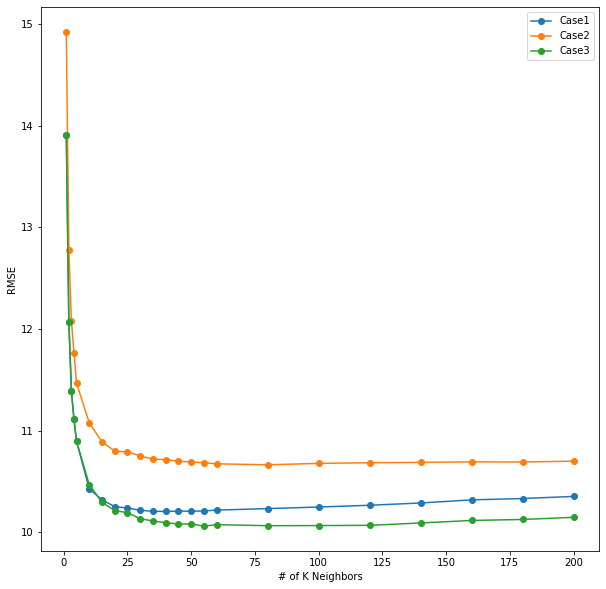

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.plot(k_list, Case1_RMSE, marker = "o")
plt.plot(k_list, Case2_RMSE, marker = "o")
plt.plot(k_list, Case3_RMSE, marker = "o")
plt.xlabel("# of K Neighbors")
plt.ylabel("RMSE")
plt.legend(["Case1", "Case2", "Case3"])
plt.show()

從圖形可以很明顯地看出，經過標準化及剔除outlier後的knn模型有最低的RMSE，而使用未經標準化的訓練集的模型則有最高的RMSE，因此我們可以推論經過標準化及剔除outlier後的knn模型有最高的準確度。